In [1]:
#set up variable
import pandas as pd 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import zipfile


# Import & merge all lein sales data

In [2]:
#URL's for lien sale data
manhattansalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/manhattan_10_day.xlsx"
bronxsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/bronx_10_day.xlsx"
brooklynsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/brooklyn_10_day.xlsx"
queenssalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/queens_10_day.xlsx"
statenislandsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/statenisland_10_day.xlsx"

In [3]:
#create dataframes
manhattansalesdf = pd.read_excel(manhattansalesurl)
bronxsalesdf = pd.read_excel(bronxsalesurl)
brooklynsalesdf = pd.read_excel(brooklynsalesurl)
queenssalesdf = pd.read_excel(queenssalesurl)
statenislandsalesdf = pd.read_excel(statenislandsalesurl)

In [4]:
#merge dataframes
allboroughs = pd.concat([queenssalesdf,brooklynsalesdf, bronxsalesdf, manhattansalesdf, statenislandsalesdf], ignore_index=True)

In [5]:
allboroughs.head()

,Borough,Block,Lot,Tax Class Code,Building Class,Community Board,Council District,House Number,Street Name,Zip Code,Water Debt Only
0,4,25,9,1,S1,402.0,26.0,45-08,VERNON BOULEVARD,11101.0,NO
1,4,32,7501,2,R0,402.0,26.0,5-03,50 AVENUE,11101.0,YES
2,4,33,7501,2,R0,402.0,NaN,50,50 AVENUE,11101.0,YES
3,4,46,23,1,B9,402.0,26.0,47-18,11 STREET,11101.0,YES
4,4,46,48,4,O1,402.0,26.0,47-01,VERNON BOULEVARD,11101.0,NO


In [6]:
#create bbl column
allboroughs["BBL"] = (allboroughs["Borough"].map(str) + allboroughs["Block "].map(str) + allboroughs["Lot"].map(str))

In [7]:
#total properities that has leins is 13060
#total_rows = allboroughs.count
#print total_rows

# Import & Merge BBL's for TC1

In [8]:
tc1bblurl = "https://raw.githubusercontent.com/tax-equity-now/tenny-property-tax-public/master/data/TC_1_bbl.csv"

In [9]:
tclbbl = pd.read_csv(tc1bblurl)

# Merge dataframe and remove non tax class 1 properities

In [10]:
tclbbl["BBL"] = tclbbl["BBL"].map(str)

In [11]:
tclbbl["BBL"].head()

0    17543
1    17840
2    19717
3    19736
4    19744
Name: BBL, dtype: object

In [12]:
allboroughs2 = pd.merge(allboroughs, tclbbl, on='BBL')

In [13]:
allboroughs2.head()

,Borough,Block,Lot,Tax Class Code,Building Class,Community Board,Council District,House Number,Street Name,Zip Code,Water Debt Only,BBL
0,4,25,9,1,S1,402.0,26.0,45-08,VERNON BOULEVARD,11101.0,NO,4259
1,4,46,23,1,B9,402.0,26.0,47-18,11 STREET,11101.0,YES,44623
2,4,128,40,1,G0,402.0,26.0,39-06,52 STREET,11377.0,NO,412840
3,4,133,57,1,A5,402.0,26.0,39-79,48 STREET,11104.0,NO,413357
4,4,151,48,1,B1,402.0,26.0,45-32,48 STREET,11377.0,NO,415148


In [14]:
#total Tax class 1 properities that have liens is 
#total_rows = allboroughs2.count
#print total_rows

# Import & merge effective tax rate data

In [15]:
Councildistricts = "https://raw.githubusercontent.com/tax-equity-now/tenny-property-tax-public/master/data/Effective_Tax_Rate_by_Council_District.csv"

In [16]:
Councildf = pd.read_csv(Councildistricts)

In [17]:
Councildf = Councildf.rename(columns={'Council District': 'CouncilDistrict'})

In [18]:
Councildf = Councildf[Councildf.CouncilDistrict != 'Total Citywide']

In [19]:
Councildf = Councildf[pd.notnull(Councildf['CouncilDistrict'])]

In [20]:
Councildf["CouncilDistrict"] = Councildf["CouncilDistrict"].astype(int)

# Import database with total TC 1 count

In [21]:
totalproptc1 = allboroughs2['Council District'].value_counts()

In [22]:
Totaltc1url = "https://raw.githubusercontent.com/tax-equity-now/tenny-property-tax-public/master/TC1_total_properities.csv"

In [23]:
totaltc1 = pd.read_csv(Totaltc1url)

In [24]:
totaltc1.head()

,Council District,Total Tax Class 1 Properities
0,1,257
1,2,364
2,3,1175
3,4,1125
4,5,343


In [25]:
totaltc1 = totaltc1.rename(columns={'Council District': 'CouncilDistrict'})

In [26]:
totaltc1["CouncilDistrict"] = totaltc1["CouncilDistrict"].astype(int)

# Find 

In [27]:
df = allboroughs2['Council District'].value_counts()

In [28]:
data = pd.countbydistrict = (allboroughs['Council District'])

In [29]:
data.head()

0    26.0
1    26.0
2     NaN
3    26.0
4    26.0
Name: Council District, dtype: float64

In [30]:
df3 = pd.DataFrame(data = df)

In [31]:
df3['index1'] = df3.index

In [32]:
df3 = df3.rename(columns={'Council District': 'Total Len', 'index1': 'CouncilDistrict'})

In [33]:
mergeddf = pd.merge(df3, Councildf, on='CouncilDistrict')

In [34]:
mergeddf.head(2)

,Total Len,CouncilDistrict,# of Properties,Effective Tax Rate w/out Exemption Based on Assessment Roll,Effective Tax Rate w/out Exemption Based on Assessment Roll 2,Compared to City Council District 7 @ .34% Based on Assessment Roll,Rank Based on Assessment Roll,# of Sales,Effective Tax Rate w/out Exemption Based on Sales Price,Effective Tax Rate w/out Exemption Based on Sales Price 2,% Higher than City Council District 33 @.29% Based on Sales Price,Rank Based on Sales Price,% of Properties that Sold
0,505,27.0,"32,255",0.009948,0.994802,292%,44.0,"1,241",0.011276,1.127554,388%,47.0,3.8%
1,498,31.0,"25,925",0.009685,0.968536,285%,41.0,"1,021",0.011054,1.105413,381%,45.0,3.9%


In [35]:
#merge in total number of tax class 1 properities
mergeddf = pd.merge(mergeddf, totaltc1, on='CouncilDistrict')

In [36]:
mergeddf["percentofproperitieswithlein"] = mergeddf["Total Len"] / mergeddf["Total Tax Class 1 Properities"]

In [37]:
mergeddf.head()

,Total Len,CouncilDistrict,# of Properties,Effective Tax Rate w/out Exemption Based on Assessment Roll,Effective Tax Rate w/out Exemption Based on Assessment Roll 2,Compared to City Council District 7 @ .34% Based on Assessment Roll,Rank Based on Assessment Roll,# of Sales,Effective Tax Rate w/out Exemption Based on Sales Price,Effective Tax Rate w/out Exemption Based on Sales Price 2,% Higher than City Council District 33 @.29% Based on Sales Price,Rank Based on Sales Price,% of Properties that Sold,Total Tax Class 1 Properities,percentofproperitieswithlein
0,505,27.0,"32,255",0.009948,0.994802,292%,44.0,"1,241",0.011276,1.127554,388%,47.0,3.8%,32255,0.015656
1,498,31.0,"25,925",0.009685,0.968536,285%,41.0,"1,021",0.011054,1.105413,381%,45.0,3.9%,25925,0.019209
2,449,28.0,"27,745",0.009446,0.944607,277%,38.0,"1,108",0.010281,1.028051,354%,40.0,4.0%,27745,0.016183
3,415,37.0,"13,159",0.006902,0.690161,203%,17.0,756,0.006406,0.640632,221%,16.0,5.7%,13159,0.031537
4,384,46.0,"32,563",0.009457,0.945690,278%,39.0,"1,074",0.010456,1.045577,360%,43.0,3.3%,32563,0.011793


In [38]:
#convert to integers
#mergeddf["Total Len"] = mergeddf["Total Len"].astype(int)
#mergeddf["Total Len"] = mergeddf["Total Len"].astype(int)

In [39]:
#export to excel 
#mergeddf.to_excel('AllData.xls')

# Plots

In [40]:
y = mergeddf["Total Len"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Sales Price 2"]

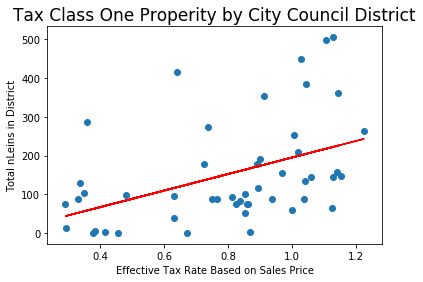

In [41]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.title('Tax Class One Properity by City Council District', color='black', fontsize=17)
plt.xlabel('Effective Tax Rate Based on Sales Price')
plt.ylabel('Total nLeins in District')

ax.scatter(x, y)

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [43]:
"r-squared:", r_value**2

('r-squared:', 0.19390673752765172)

In [44]:
y = mergeddf["Total Len"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Assessment Roll 2"]

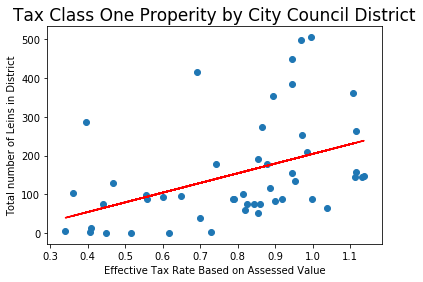

In [45]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.title('Tax Class One Properity by City Council District', color='black', fontsize=17)
plt.xlabel('Effective Tax Rate Based on Assessed Value')
plt.ylabel('Total number of Leins in District')

ax.scatter(x, y)

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [47]:
"r-squared:", r_value**2

('r-squared:', 0.18561710600734019)

In [48]:
y = mergeddf["percentofproperitieswithlein"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Sales Price 2"]

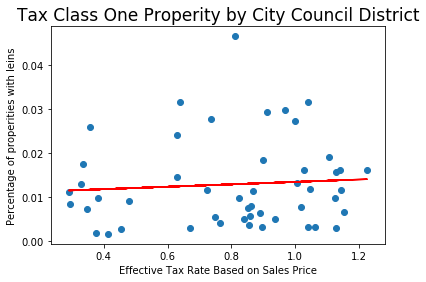

In [49]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.title('Tax Class One Properity by City Council District', color='black', fontsize=17)
plt.xlabel('Effective Tax Rate Based on Sales Price')
plt.ylabel('Percentage of properities with leins')

ax.scatter(x, y)

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [51]:
"r-squared:", r_value**2

('r-squared:', 0.005861368318264221)

In [52]:
y = mergeddf["percentofproperitieswithlein"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Assessment Roll 2"]

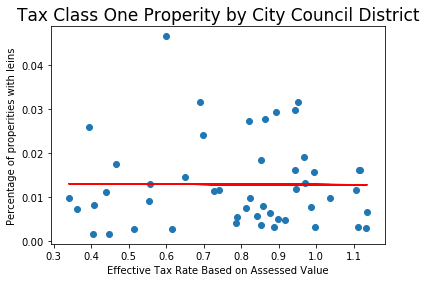

In [53]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.title('Tax Class One Properity by City Council District', color='black', fontsize=17)
plt.xlabel('Effective Tax Rate Based on Assessed Value')
plt.ylabel('Percentage of properities with leins')

ax.scatter(x, y)

In [54]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [55]:
"r-squared:", r_value**2

('r-squared:', 4.1533242449230211e-05)

In [56]:
#merged2 = merged2[merged2.apply(lambda x#remove standard deviation
#merged2 = pd.concat([mergeddf["Total Len"], mergeddf["Effective Tax Rate w/out Exemption Based on Assessment Roll 2"]], axis=1, keys=['Total Len', 'Effective Tax Rate w/out Exemption Based on Assessment Roll']): np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]